In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<h2>Define Hyper-parameters</h2>

In [2]:
lr = 0.5
NUM_ITER  = 100
n_hidden=2
num_input=2
num_output=1

<h2>Define your input data and expected labels</h2>

In [3]:
x = np.array([[0,0],[1,0],[1,1],[0,1]],np.float32)
y = np.array([0,1,0,1],np.float32)
y = np.reshape(y,[4,1])
# print(y.shape)

<h2>Define placeholder and Variables</h2>

In [4]:
X = tf.placeholder(tf.float32,shape=[4,2],name='X')
Y = tf.placeholder(tf.float32,shape=[4,1],name='Y')

weights = {
    'W1': tf.Variable(tf.random_normal([num_input, n_hidden]),tf.float32,name='W1'),
    'Wout' : tf.Variable(tf.random_normal([n_hidden,num_output]),tf.float32,name='Wout')
}

biases = {
    'b1': tf.Variable(tf.zeros(shape=[n_hidden]),tf.float32,name='b1'),
    'bout': tf.Variable(tf.zeros(shape=[num_output]),tf.float32,name='bout')
}

<h2>Define the neural network</h2>

In [5]:
def neural_net(x):
    layer_1_out = tf.add(tf.matmul(x,weights['W1']),biases['b1'])
    out = tf.add(tf.matmul(layer_1_out,weights['Wout']),biases['bout'])
    return out

<h2>Define cost function</h2>

In [6]:
logits = neural_net(X)


loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y),name='loss')

optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

init = tf.global_variables_initializer()

# loss_summary = tf.summary.scalar('loss',loss)
# file_writer = tf.summary.FileWriter(logdir,tf.get_default_graph())

<h2>Execute training</h2>

In [12]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)  
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))  
with tf.Session() as sess:
    sess.run(init)
    for i in range(100):
        summary = sess.run(train_op,feed_dict={X:x,Y:y})
        if i % 10 ==0:
            acc = sess.run(accuracy,feed_dict={X:x,Y:y})
#             W = sess.run(weights)
            print("step "+str(i)+", Accuracy= {:.3f}".format(acc))
    
    print("Training finished!")
    W = np.squeeze(sess.run(weights['Wout']))
    b = np.squeeze(sess.run(biases['bout']))
    print(W,b)
#     for i in range(NUM_ITER):
#         if i%10 == 0:
#             #fetch the loss every 10 iterations
#             summary = sess.run(loss_summary,feed_dict={X:x,Y:y})
#             #add the summary to file writer
#             file_writer.add_summary(summary,i)
#         #every iteration we run optimization on the training data X and labels Y
#         sess.run(train_op,feed_dict = {X:x,Y:y})
#     for i in range(100):
#         summary = sess.run(loss_summary,feed_dict={X:x,Y:y})
#         if i % 10 ==0:
#             acc = sess.run(accuracy,feed_dict={X:x,Y:y})
#             print("step "+str(i)+", Accuracy= {:.3f}".format(acc))
    
#     print("Training finished!")
    

step 0, Accuracy= 1.000
step 10, Accuracy= 1.000
step 20, Accuracy= 1.000
step 30, Accuracy= 1.000
step 40, Accuracy= 1.000
step 50, Accuracy= 1.000
step 60, Accuracy= 1.000
step 70, Accuracy= 1.000
step 80, Accuracy= 1.000
step 90, Accuracy= 1.000
Training finished!
[-0.47113827 -0.09064823] 0.019833952


<h2>Plot</h2>

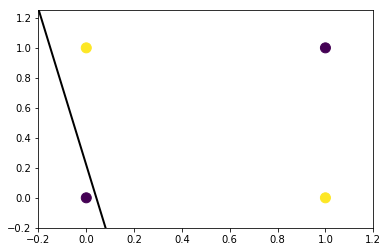

In [13]:
#plot out the decision line determined by learned weight and bias
import matplotlib.pyplot as plt
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y = 1 / W[1] * (-W[0] * plot_x - b)

plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()